In [4]:
import tensorflow as tf
from tensorflow.keras import models , layers
import matplotlib.pyplot as plt

In [31]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/Users/hayat/Desktop/ML_6.23_MODELS/data_ana/acne/ai project/database",
    shuffle = True,
    image_size = (550,550) ,
    batch_size = 32
)

Found 999 files belonging to 3 classes.


In [32]:
class_names = dataset.class_names

In [33]:
print(class_names)
train_size = 0.8
len(dataset) * train_size
val_size = 0.1
len(dataset) * val_size

['Level_0', 'Level_1', 'Level_2']


3.2

In [34]:
train_ds= dataset.take(25) #taking 25 batches each having size 32
test_ds = dataset.skip(25)

In [35]:
val_ds = test_ds.take(3)
len(val_ds)

3

In [7]:
test_ds = test_ds.skip(3)
len(test_ds)

4

In [8]:
for batch,label in dataset.take(1):
    print(len(batch))

32


In [11]:
train_ds= train_ds.cache().shuffle(500).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds= test_ds.cache().shuffle(500).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds= val_ds.cache().shuffle(500).prefetch(buffer_size = tf.data.AUTOTUNE)

In [12]:
input_shape = (32,550,550,3)
n_classes = 3
model = models.Sequential([
    tf.keras.Sequential([
      layers.experimental.preprocessing.Resizing(550,550),                
     layers.experimental.preprocessing.Rescaling(1.0/550)               
]),
    tf.keras.Sequential([
     layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
      layers.experimental.preprocessing.RandomRotation(0.2)                
]) ,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape= input_shape)



In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 550, 550, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 550, 550, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 548, 548, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 274, 274, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 272, 272, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 136, 136, 64)     0         
 2D)                                                  

In [14]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [16]:
from tensorflow.python.ops.gen_batch_ops import batch
history = model.fit(
   train_ds,
   epochs =1 ,
   batch_size = 32 ,
   verbose = 1,
   validation_data = val_ds
)

25/25 [==============================] - 216s 9s/step - loss: 1.0483 - accuracy: 0.4300 - val_loss: 1.0217 - val_accuracy: 0.4167


In [17]:
score = model.evaluate(test_ds)

4/4 [==============================] - 8s 1s/step - loss: 0.9762 - accuracy: 0.5728


1/1 [==============================] - 0s 63ms/step


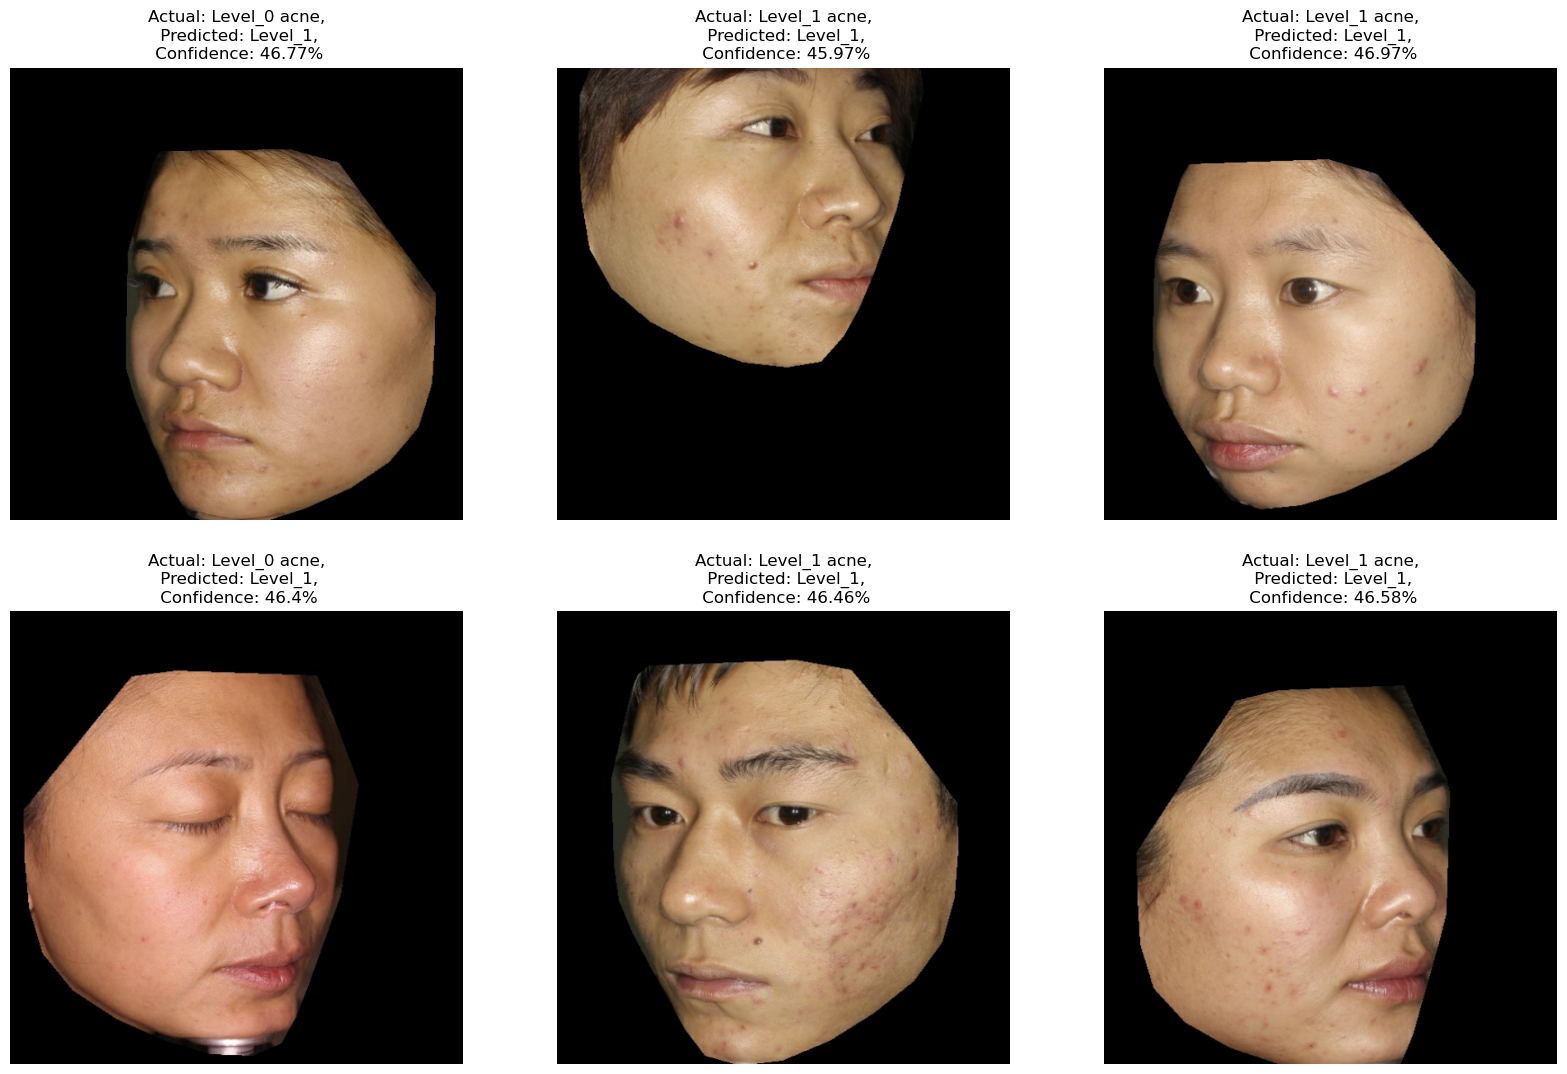

In [39]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class} acne,\n Predicted: {predicted_class},\n Confidence: {confidence}%")
        
        plt.axis("off")

In [32]:
import os

INFO:tensorflow:Assets written to: ../models/['.ipynb_checkpoints']/assets


INFO:tensorflow:Assets written to: ../models/['.ipynb_checkpoints']/assets


In [33]:
model.save('acne.h5')
print('Model Saved!')

Model Saved!


In [40]:
from tensorflow.keras.models import load_model
model=load_model('acne.h5')

In [41]:
model

In [55]:
im1  = tf.keras.preprocessing.image.load_img('/Users/hayat/Desktop/ML_6.23_MODELS/data_ana/acne/ai project/p1.jpeg')
im2 = tf.keras.preprocessing.image.load_img('/Users/hayat/Desktop/ML_6.23_MODELS/data_ana/acne/ai project/p2.jpeg')

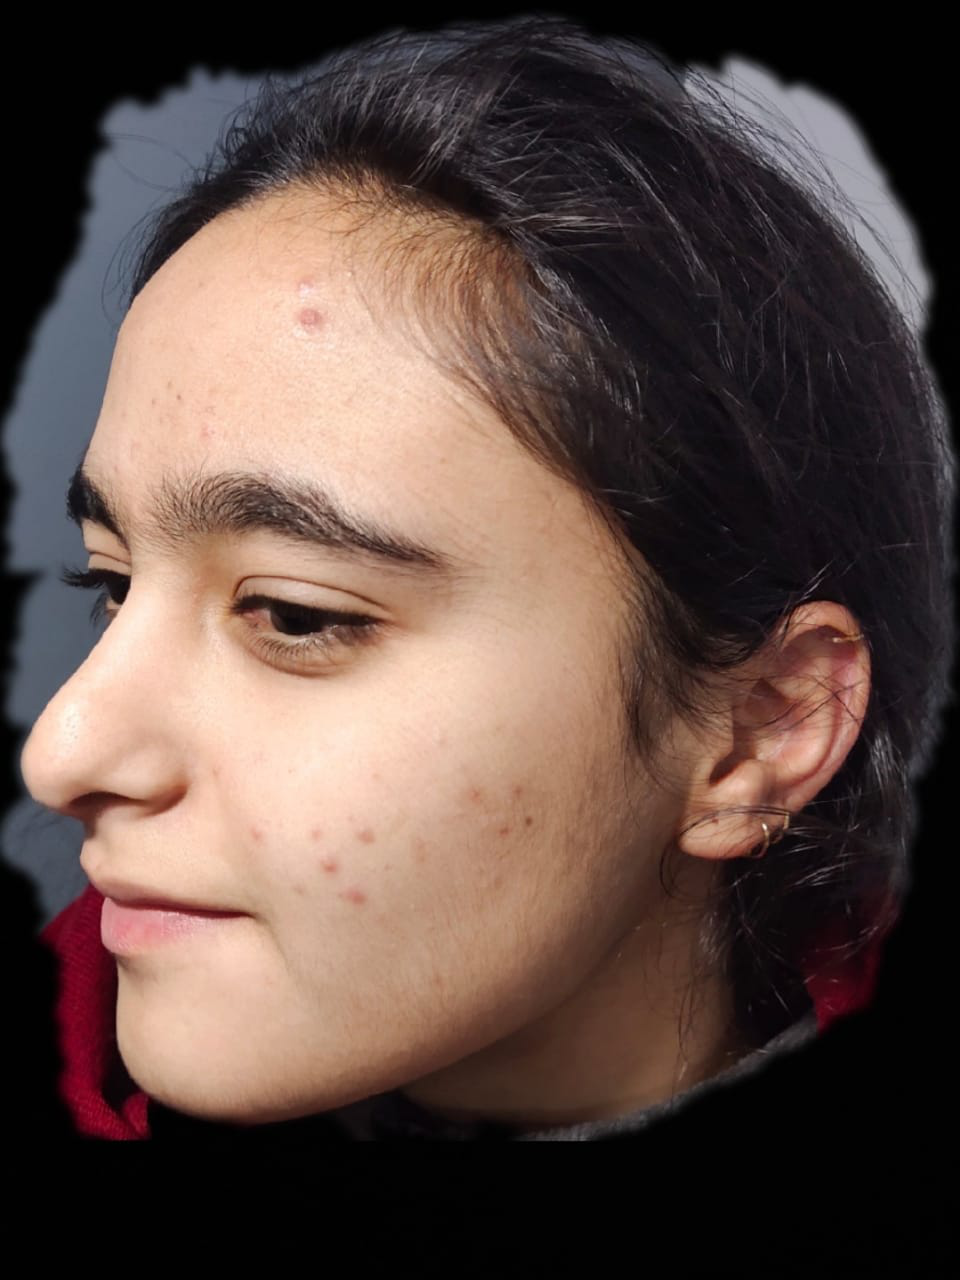

In [66]:
im2#right side of the face

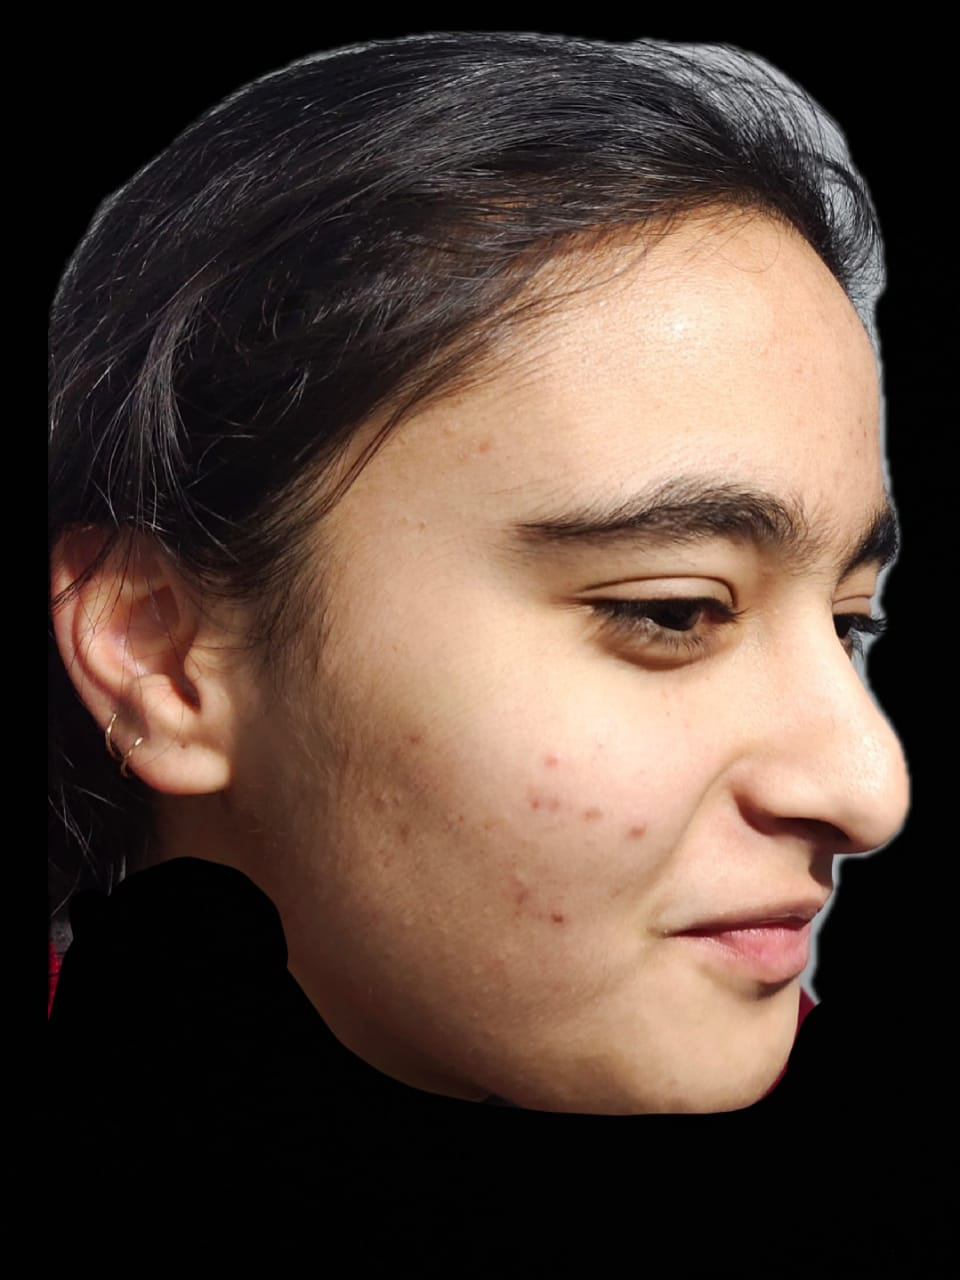

In [71]:
im #left side of the face

In [67]:
image_open = open('/Users/hayat/Desktop/ML_6.23_MODELS/data_ana/acne/ai project/p1.jpeg', 'rb')
image_open2 = open('/Users/hayat/Desktop/ML_6.23_MODELS/data_ana/acne/ai project/p2.jpeg', 'rb')
read_image = image_open.read()
read_image2 = image_open2.read()
image_decode = tf.image.decode_jpeg(read_image)
image_decode2 = tf.image.decode_jpeg(read_image2)
resize_image = tf.image.resize(image_decode, [550,550])
resize_image2 = tf.image.resize(image_decode2, [550,550])
resize_image = np.expand_dims(resize_image.numpy(), axis=0)
resize_image2 = np.expand_dims(resize_image2.numpy(), axis=0)

In [81]:
r1 = model.predict(resize_image)
r2 = model.predict(resize_image2)
print(f"The confidence percentage of level0,1 and 3 for image 1:{r1}")
print(f"The confidence percentage of level0,1 and 3 for image 2:{r2}")

1/1 [==============================] - 0s 64ms/step
The confidence percentage of level0,1 and 3 for image 1:[[0.40143433 0.46146095 0.13710466]]
The confidence percentage of level0,1 and 3 for image 2:[[0.40105268 0.46043068 0.1385166 ]]


In [105]:
predictions = model.predict(resize_image)
predicted_class = class_names[np.argmax(predictions[0])]
confidence = round(100 * (np.max(predictions[0])), 2)
print(confidence,predicted_class)

predictions2 = model.predict(resize_image2)
predicted_class2 = class_names[np.argmax(predictions2[0])]
confidence2 = round(100 * (np.max(predictions2[0])), 2)
print(confidence2,predicted_class2)

1/1 [==============================] - 0s 111ms/step
46.15 Level_1
1/1 [==============================] - 0s 65ms/step
46.04 Level_1


Text(0.5, 1.0, 'RIGHT SIDE  \n acne,\n Predicted: Level_1,\n Confidence: 46.04%')

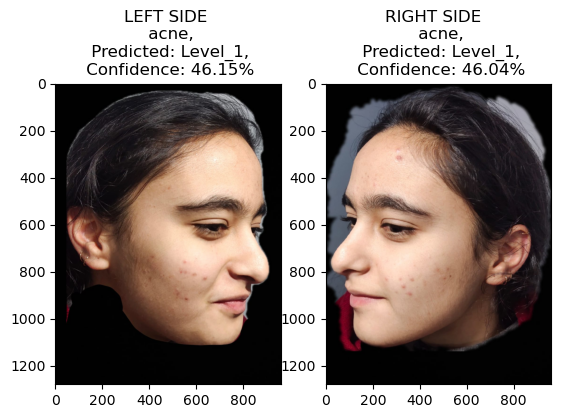

In [108]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(im)
ax.set_title(f"LEFT SIDE \n acne,\n Predicted: {predicted_class},\n Confidence: {confidence}%")

ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(im2)
imgplot.set_clim(0.0, 0.7)
ax.set_title(f"RIGHT SIDE  \n acne,\n Predicted: {predicted_class2},\n Confidence: {confidence2}%")